# **Exploratory Data Analysis**

## Here we will be performing Descriptor Calculation and Exploratory Data Analysis

### We will be using conda and rdkit

In [ ]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
# ! chmod +x Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
# ! bash ./Miniconda3-py310_23.3.1-0-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
# import sys
# sys.path.append('usr/local/lib/python3.10/site-packages/')

In [ ]:
# !pip install rdkit deepchem

In [ ]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
# import sys
# sys.path.append('usr/local/lib/python3.7/site-packages/')

# **Load bioactivity data**

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

# **Calculate Lipinski descriptors**

Lipinski(Pfizer) came up with a set of rules for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorbtion, Distribution, Metabolism and Excretion(ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five(all of them are multiply of five) or Lipinski's Rule.

The Lipinski's Rule states the following:



*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient(LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10



In [ ]:
# import rdkit
# from rdkit import Chem
# from IPython import display
# from rdkit.Chem.Draw import IPythonConsole
# from IPython.display import display
# import pandas

## Import libraries

In [13]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# **Bugfix for Import rdkit**

In [1]:
! pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.2 MB/s eta 0:00:00


In [2]:
!cat  /etc/lsb-release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=20.04
DISTRIB_CODENAME=focal
DISTRIB_DESCRIPTION="Ubuntu 20.04.5 LTS"


In [3]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [4]:
import rdkit
from rdkit import Chem
from IPython import display
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
import pandas

In [5]:
mol = Chem.MolFromSmiles('c1ccccc1C(=O)O')

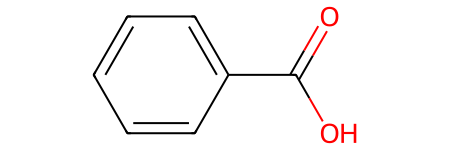

In [6]:
mol

# **Bug Fix End**

### Calculate descriptors

In [14]:
# function courtesy of: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1, 1)
  i = 0
  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])
    
    if(i == 0):
      baseData = row
    else:
        baseData=np.vstack([baseData, row])
    i = i + 1

  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData, columns = columnNames)

  return descriptors

In [15]:
df_lipinski = lipinski(df.canonical_smiles)

# **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [16]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0
